In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values present in the dataset, but there are columns having '?' in it. Therefore we will replace that with null values.

In [7]:
# there are '?' in the datset which we have to remove by NaN Values

data = data.replace('?',np.NaN)

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# we will replace the '?' by the most common collision type as we are unaware of the type.
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
data['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
data['police_report_available'].fillna('NO', inplace = True)

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
data = data.drop(['_c39'], axis=1)

data.shape

(1000, 39)

#### Data Visualization

In [10]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

N    753
Y    247
Name: fraud_reported, dtype: int64


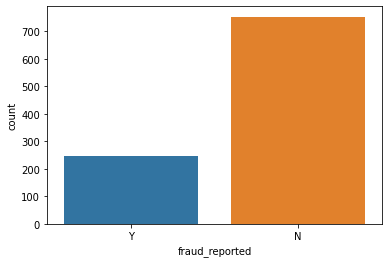

In [11]:
sns.countplot(data['fraud_reported'])
print(data['fraud_reported'].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


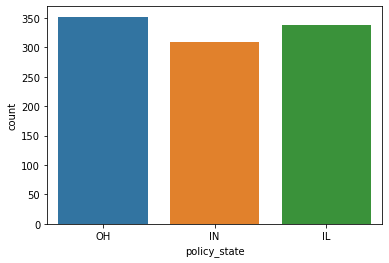

In [12]:
sns.countplot(data['policy_state'])
print(data['policy_state'].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


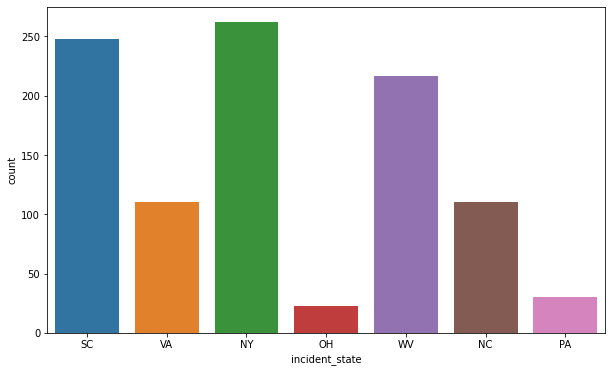

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data['incident_state'])
print(data['incident_state'].value_counts())

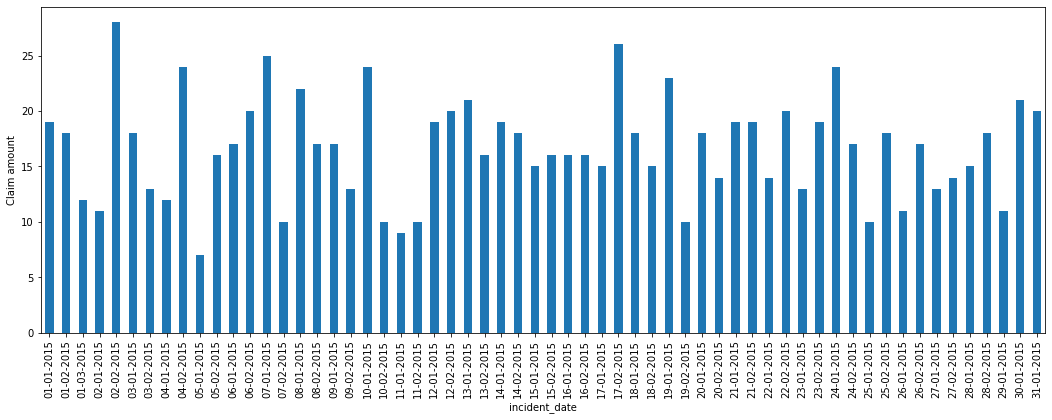

In [14]:
fig = plt.figure(figsize=(18,6))
ax = data.groupby('incident_date').total_claim_amount.count().plot.bar()
ax.set_ylabel('Claim amount')
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

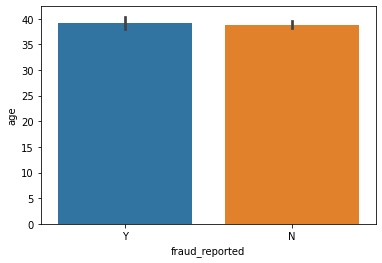

In [15]:
sns.barplot(y='age', x='fraud_reported', data = data)

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


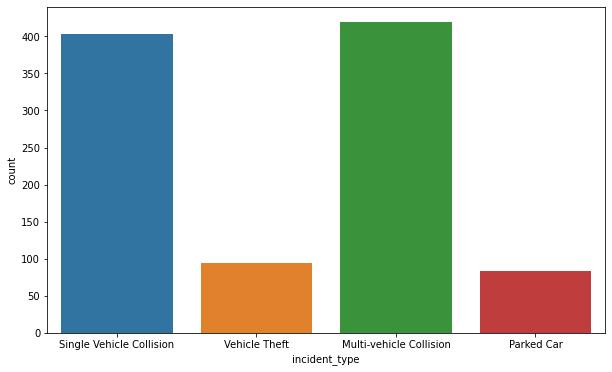

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data['incident_type'])
print(data['incident_type'].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


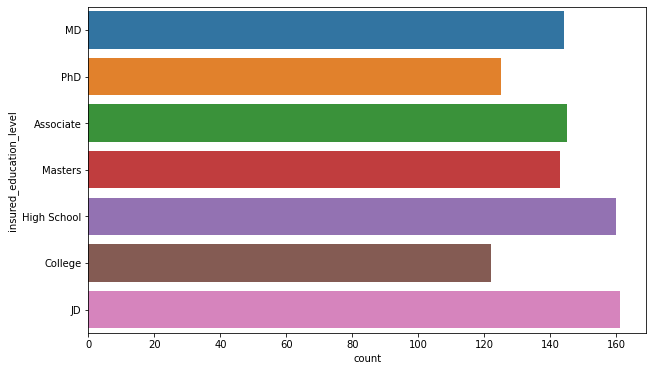

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(y = data['insured_education_level'])
print(data['insured_education_level'].value_counts())

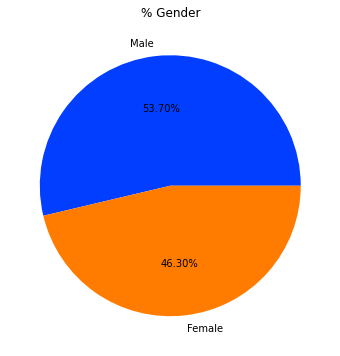

In [18]:
plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data['insured_sex'].value_counts()*100.0 /len(data),
        labels=['Male', 'Female'],
        colors=palette_color,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Gender')
plt.show()

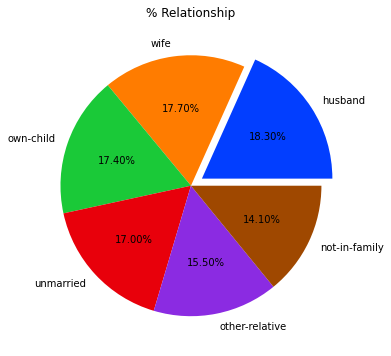

In [19]:
# declaring exploding pie
explode = [0.1, 0, 0, 0, 0, 0]

plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

keys = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family']
  
# plotting data on chart
plt.pie(data['insured_relationship'].value_counts()*100.0 /len(data),
        labels=keys,
        colors=palette_color,
        explode = explode,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Relationship')
plt.show()

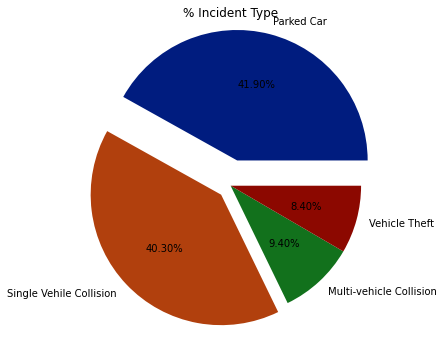

In [20]:
# declaring exploding pie
explode = [0.2, 0.1, 0, 0]

plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

keys = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft']
  
# plotting data on chart
plt.pie(data['incident_type'].value_counts()*100.0 /len(data),
        labels=keys,
        colors=palette_color,
        explode = explode,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Incident Type')
plt.show()

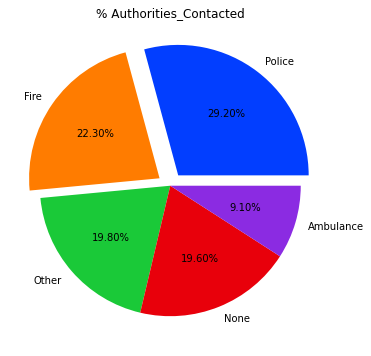

In [21]:
# declaring exploding pie
explode = [0.1, 0.1, 0, 0, 0]

plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

keys = ['Police', 'Fire', 'Other', 'None', 'Ambulance']
  
# plotting data on chart
plt.pie(data['authorities_contacted'].value_counts()*100.0 /len(data),
        labels=keys,
        colors=palette_color,
        explode = explode,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Authorities_Contacted')
plt.show()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


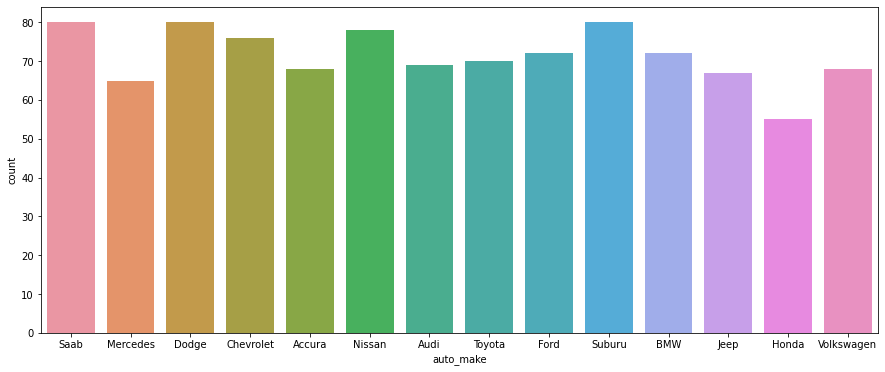

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data['auto_make'])
print(data['auto_make'].value_counts())

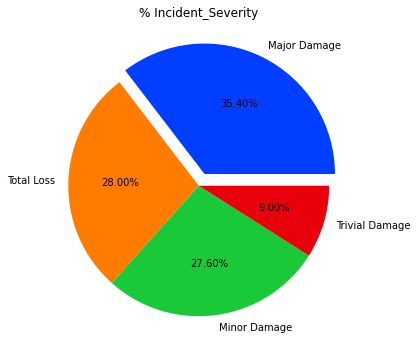

In [23]:
# declaring exploding pie
explode = [0.1, 0, 0, 0]

plt.figure(figsize=(10,6))

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

keys = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage']
  
# plotting data on chart
plt.pie(data['incident_severity'].value_counts()*100.0 /len(data),
        labels=keys,
        colors=palette_color,
        explode = explode,
        autopct='%.2f%%')
  
# displaying chart
plt.title('% Incident_Severity')
plt.show()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


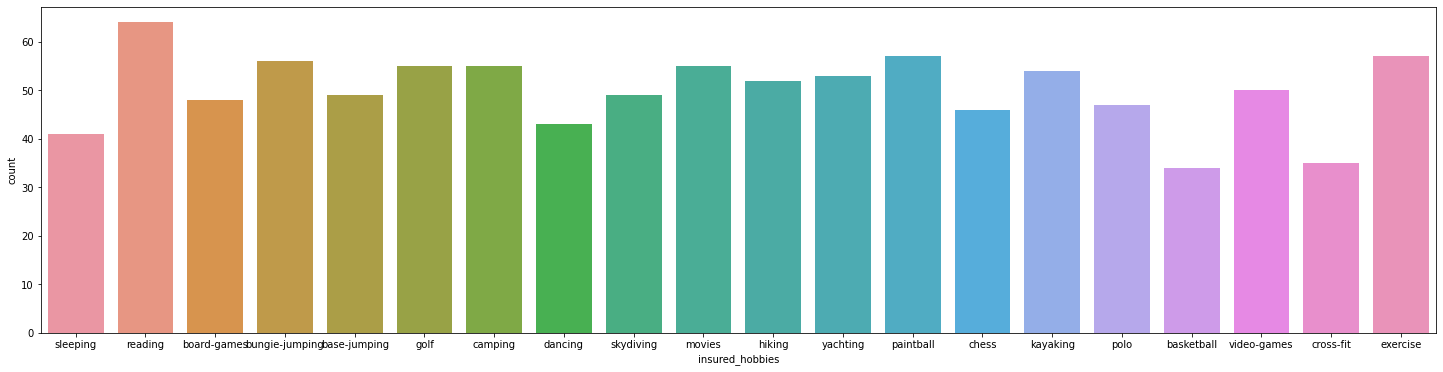

In [24]:
plt.figure(figsize=(25,6))
sns.countplot(data['insured_hobbies'])
print(data['insured_hobbies'].value_counts())

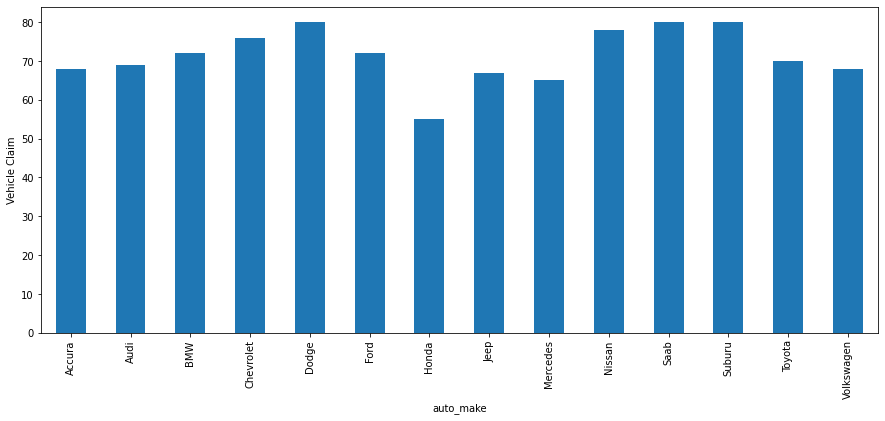

In [25]:
fig = plt.figure(figsize=(15,6))
ax = data.groupby('auto_make').vehicle_claim.count().plot.bar()
ax.set_ylabel('Vehicle Claim')
plt.show()

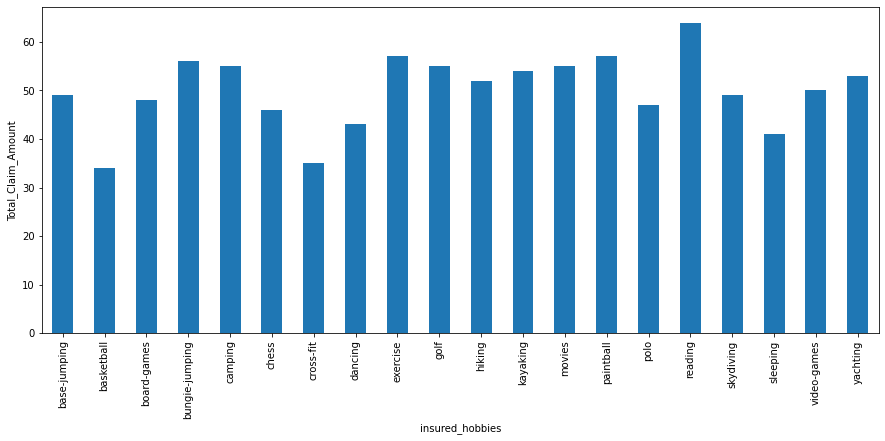

In [26]:
fig = plt.figure(figsize=(15,6))
ax = data.groupby('insured_hobbies').total_claim_amount.count().plot.bar()
ax.set_ylabel('Total_Claim_Amount')
plt.show()

### Data Processing

In [27]:
data['fraud_reported'].replace(('Y','N'), (1,0), inplace=True)

In [28]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

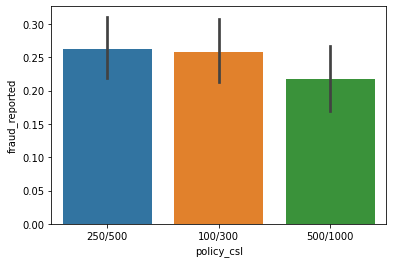

In [29]:
sns.barplot(x='policy_csl', y='fraud_reported', data = data)

In [30]:
data.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

auto_year has 21 levels, and the number of records for each of the levels are quite significant considering datasize is not so large. We will do some feature engineering using this variable considering, the year of manufacturing of automobile indicates the age of the vehicle and may contain valuable information for insurance premium or fraud is concerned.

In [31]:
data['vehicle_age'] = 2022 - data['auto_year'] # Deriving the age of the vehicle based on the year value 
data['vehicle_age'].head()

0    18
1    15
2    15
3     8
4    13
Name: vehicle_age, dtype: int64

In [32]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
data['incident_period_of_day'] = pd.cut(data.incident_hour_of_the_day, bins, labels=names).astype(object)
data[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


Policy Number is a unique value assigned to customers for identification purpose only. It does not make any difference in fraud_detection. Therefore we will remove the column.

Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level. We will remove these columns also.

In [33]:
# Dropping Unimportant columns;

data = data.drop(columns = ['policy_number', 
                            'policy_csl',
                            'insured_zip',
                            'policy_bind_date', 
                            'incident_date', 
                            'incident_location', 
                            'auto_year', 
                            'incident_hour_of_the_day'])

data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,YES,71610,6510,13020,52080,Saab,92x,1,18,early_morning
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,NO,5070,780,780,3510,Mercedes,E400,1,15,morning
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,NO,34650,7700,3850,23100,Dodge,RAM,0,15,morning
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,1,8,early_morning
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,NO,6500,1300,650,4550,Accura,RSX,0,13,evening


In [34]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [35]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [36]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age,incident_period_of_day
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,71610,6510,13020,52080,10,1,1,18,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,5070,780,780,3510,8,12,1,15,4
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,0,34650,7700,3850,23100,4,30,0,15,4
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,0,63400,6340,6340,50720,3,34,1,8,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,6500,1300,650,4550,0,31,0,13,2


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_state,1000.0,1.014000e+00,8.309600e-01,0.00,0.0000,1.0,2.000,2.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_sex,1000.0,4.630000e-01,4.988786e-01,0.00,0.0000,0.0,1.000,1.00
insured_education_level,1000.0,2.966000e+00,1.948497e+00,0.00,1.0000,3.0,5.000,6.00
insured_occupation,1000.0,6.653000e+00,4.019048e+00,0.00,3.0000,7.0,10.000,13.00
insured_hobbies,1000.0,9.731000e+00,5.674049e+00,0.00,5.0000,10.0,15.000,19.00


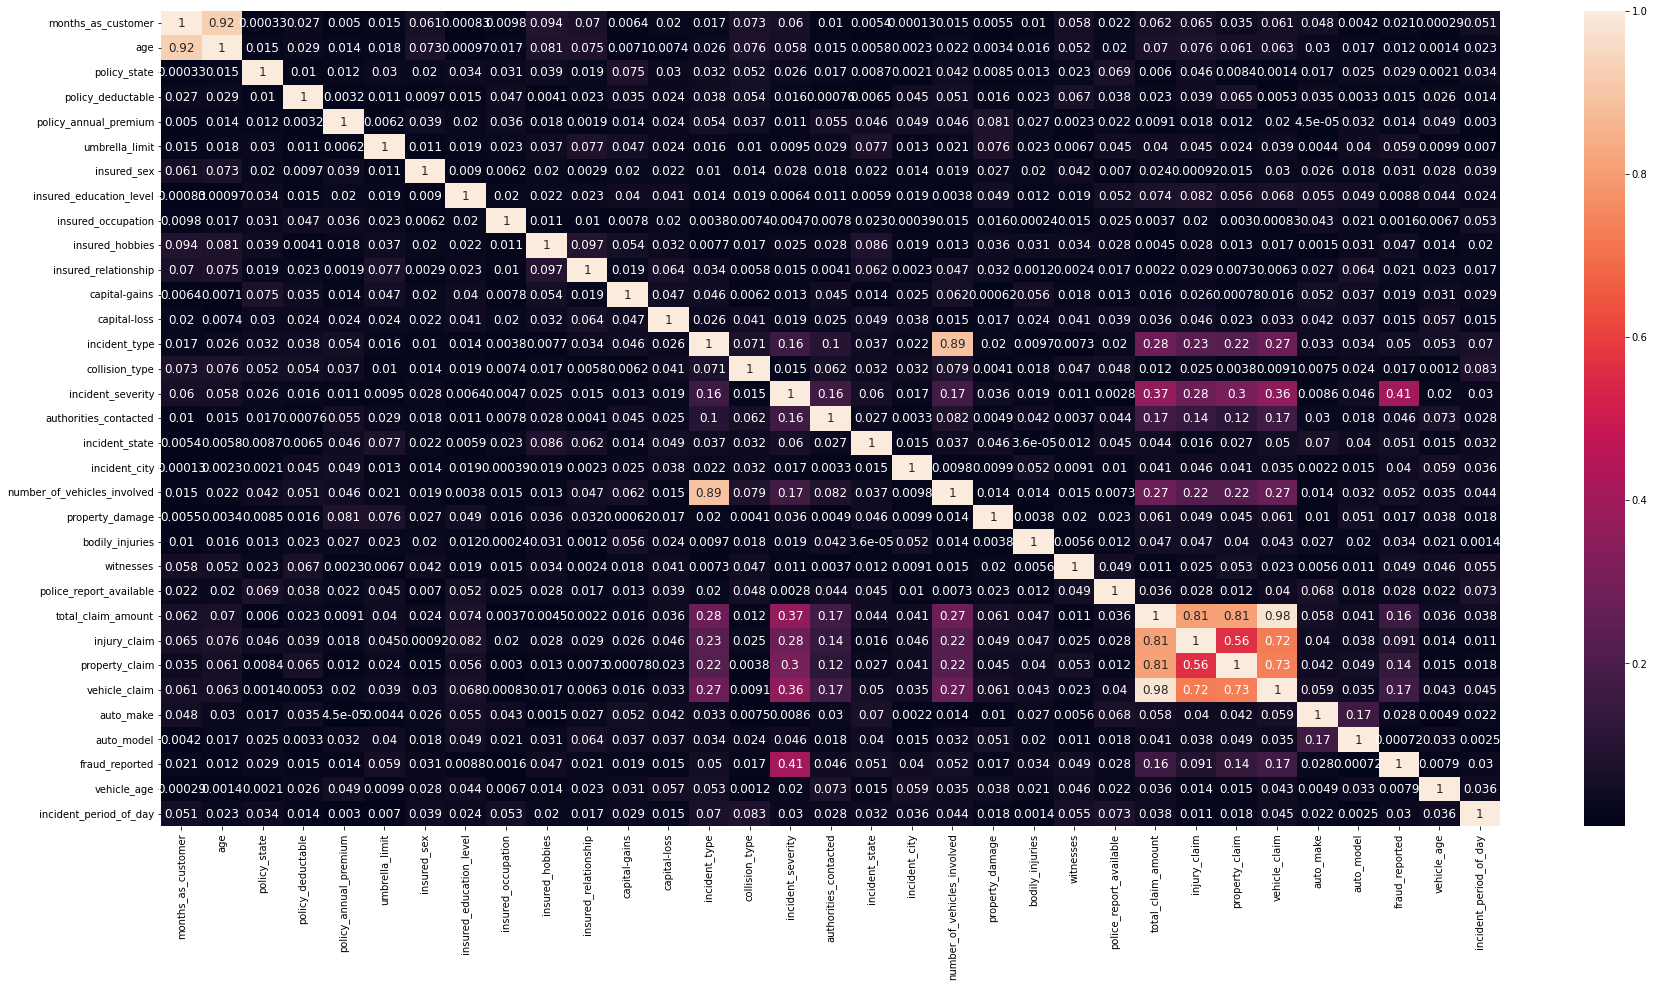

In [38]:
data_corr = data.corr().abs()

plt.figure(figsize = (30,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

There are muliple columns have strong Correlation with others. We will also check for multicollinearity using VIF.

### Checking Skewness and Outliers

In [39]:
x = data.drop(['fraud_reported'], axis=1)
y = data['fraud_reported']

In [40]:
print(x.shape)
print(y.shape)

(1000, 32)
(1000,)


In [41]:
x.skew().sort_values(ascending = False)

umbrella_limit                 1.806712
property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
incident_severity              0.279016
injury_claim                   0.264811
insured_sex                    0.148630
incident_type                  0.101507
incident_period_of_day         0.080957
insured_relationship           0.077488
incident_city                  0.049531
vehicle_age                    0.048289
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
insured_education_level       -0.000148
auto_make                     -0.018797
policy_state                  -0.026177
collision_type                -0.033682
insured_occupation            -0.058881


Keeping +/- 0.5 as the range for skewness, here are the columns which are beyond the range.

- umbrella_limit - Categorical
- property_damage - Categorical
- police_report_available - Categorical
- number_of_vehicles_involved - Categorical
- total_claim_amount - Continuous Data
- vehicle_claim - Continuous Data

Two columns are having continuous data and has skewness beyond the range. Therefore we will treat the skewness.

In [42]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [43]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.363693
insured_sex                    0.148630
capital-loss                   0.090488
capital-gains                  0.038722
policy_deductable              0.023988
policy_annual_premium          0.004758
age                           -0.001945
incident_severity             -0.079282
incident_type                 -0.088766
vehicle_age                   -0.096244
bodily_injuries               -0.128799
collision_type                -0.129334
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
insured_relationship          -0.160421
incident_city                 -0.181772
incident_period_of_day        -0.187172
insured_education_level       -0.188564
authorities_contacted         -0.227269
auto_make                     -0.227539
insured_occupation            -0.239336
insured_hobbies               -0.247798


In [44]:
x = pd.DataFrame(x_new, columns = x.columns)

In [45]:
x.shape

(1000, 32)

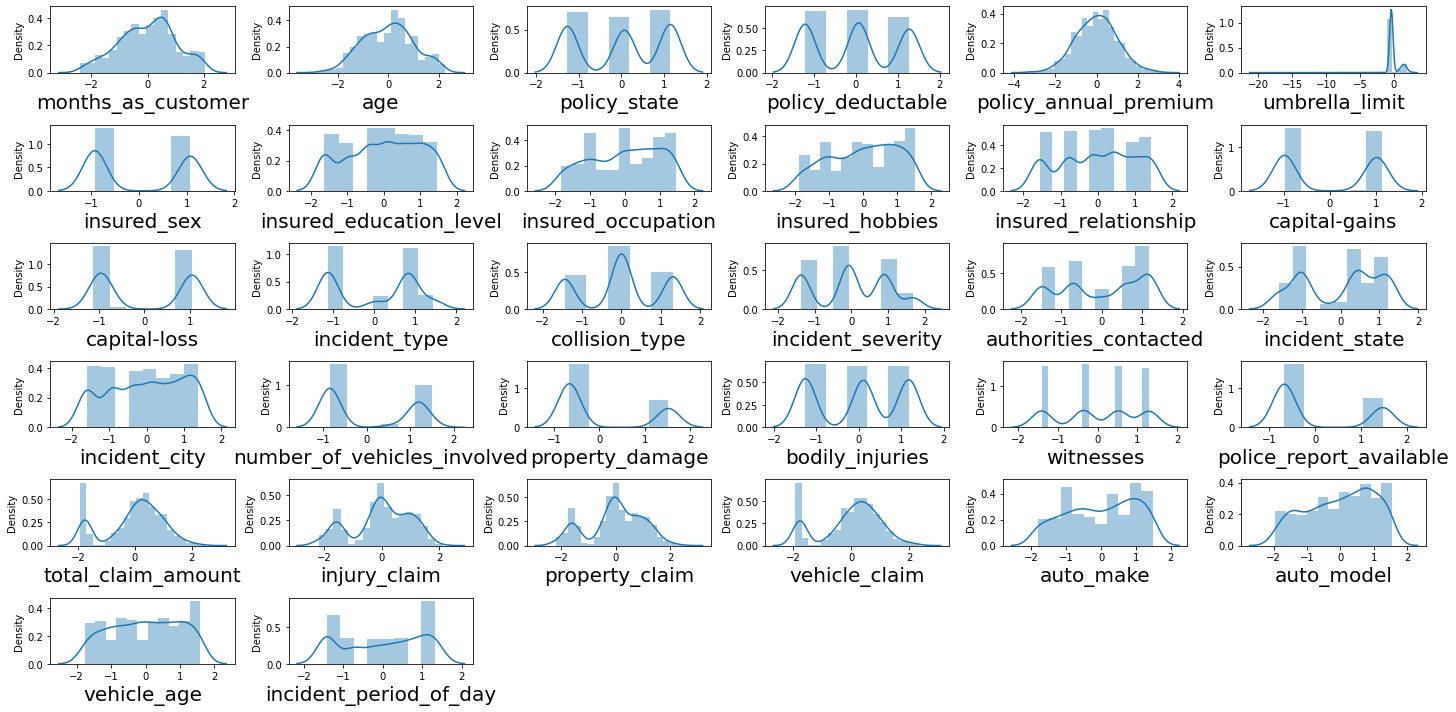

In [46]:
plt.figure(figsize = (20,10))
plotnumber = 1

for column in x:
    if plotnumber <= 32:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

### Checking Outliers

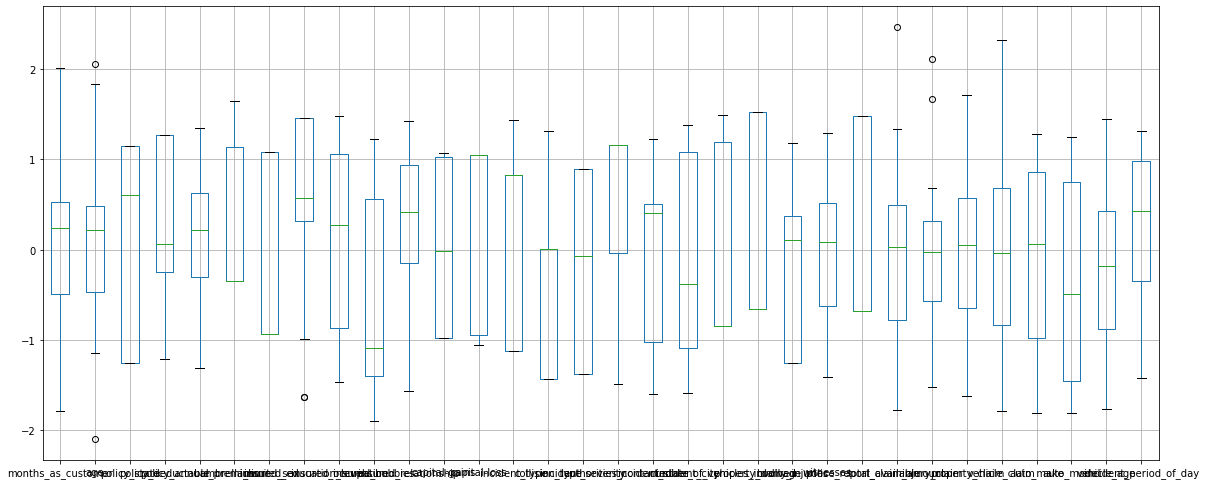

In [47]:
x.iloc[:16,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

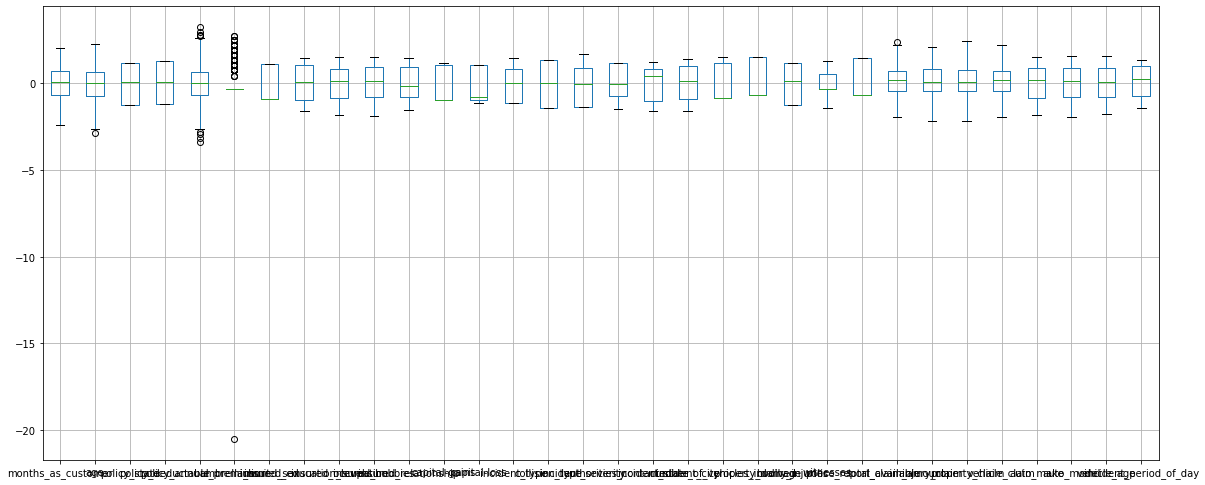

In [48]:
x.iloc[16:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [49]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
months_as_customer              True
age                             True
policy_state                    True
policy_deductable               True
policy_annual_premium          False
umbrella_limit                  True
insured_sex                     True
insured_education_level         True
insured_occupation              True
insured_hobbies                 True
insured_relationship            True
capital-gains                   True
capital-loss                    True
incident_type                   True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_state                  True
incident_city                   True
number_of_vehicles_involved     True
property_damage                 True
bodily_injuries                 True
witnesses                       True
police_report_available         True
total_claim_amount              True
injury_claim                    True
property_cl

Features having outliers in High Side are: 1. policy_annual_premium

Features having outliers in Low side are: 1. policy_annual_premium, 2. umbrella_limit

But Umbrella limit is having categorical data, and consists 0 as a value in it. Therefore we will not treat this as an outlier.

In [50]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [51]:
policy_annual_premium_high = q3.policy_annual_premium + (1.5 * iqr.policy_annual_premium)

# Check the Indexes which have higher values

index1 = np.where(x['policy_annual_premium']> policy_annual_premium_high)

x = x.drop(x['policy_annual_premium'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(995, 32)
(995,)


In [52]:
policy_annual_premium_low = q1.policy_annual_premium - (1.5 * iqr.policy_annual_premium)

# Check the Indexes which have higher values

index1 = np.where(x['policy_annual_premium']< policy_annual_premium_low)

x = x.drop(x['policy_annual_premium'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(991, 32)
(991,)


In [53]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
months_as_customer             True
age                            True
policy_state                   True
policy_deductable              True
policy_annual_premium          True
umbrella_limit                 True
insured_sex                    True
insured_education_level        True
insured_occupation             True
insured_hobbies                True
insured_relationship           True
capital-gains                  True
capital-loss                   True
incident_type                  True
collision_type                 True
incident_severity              True
authorities_contacted          True
incident_state                 True
incident_city                  True
number_of_vehicles_involved    True
property_damage                True
bodily_injuries                True
witnesses                      True
police_report_available        True
total_claim_amount             True
injury_claim                   True
property_claim                 True
v

Now the outliers are treated. We can proceed furthur.

In [54]:
# Percentage Data Loss

Data_loss = ((1000-991)/1000)*100

Data_loss

0.8999999999999999

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,4.734512,months_as_customer
1,4.732385,age
2,1.031845,policy_state
3,1.033561,policy_deductable
4,1.036562,policy_annual_premium
5,1.031850,umbrella_limit
6,1.030411,insured_sex
7,1.036313,insured_education_level
8,1.018793,insured_occupation
9,1.052927,insured_hobbies


The column total_claim_amount and vehicle_claim are having strong correlation between them. Therefore we reed to remove one column in order to reduce mulitcollinearity.

In [57]:
x = x.drop(['vehicle_claim'], axis=1)

x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,vehicle_age,incident_period_of_day
0,1.051279,1.008733,1.146048,0.067784,0.616676,-0.349113,1.076953,0.568665,-1.154771,1.227979,...,0.108332,0.517616,1.478078,0.715714,0.005762,1.081793,0.859111,-1.808345,0.235252,-0.744650
1,0.304536,0.431433,0.071806,1.271863,-0.242577,1.357817,1.076953,0.568665,-0.089755,0.920483,...,-1.254857,-1.410682,-0.676554,-1.776979,-1.525347,-1.557391,0.418616,-0.586225,-0.260249,0.620591
2,-0.511226,-1.139513,1.146048,1.271863,0.642206,1.357817,-0.928546,1.462749,1.055047,-1.402398,...,1.178068,1.290743,-0.676554,-0.716825,0.223833,-0.577507,-0.555149,0.944905,-0.260249,0.620591
3,0.523344,0.327852,-1.259374,1.271863,0.652860,1.644005,-0.928546,1.462749,-1.464730,-1.402398,...,0.108332,0.517616,-0.676554,0.391426,-0.026762,-0.034793,-0.828189,1.252785,-1.555915,-0.744650
4,0.304536,0.631918,-1.259374,0.067784,1.342030,1.644005,1.076953,-1.631894,1.055047,-1.402398,...,-1.254857,-0.355794,-0.676554,-1.729802,-1.304154,-1.622102,-1.809810,1.022679,-0.607377,-0.220378


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,4.729697,months_as_customer
1,4.721262,age
2,1.031740,policy_state
3,1.032759,policy_deductable
4,1.027622,policy_annual_premium
5,1.029913,umbrella_limit
6,1.029244,insured_sex
7,1.036188,insured_education_level
8,1.016982,insured_occupation
9,1.049111,insured_hobbies


We can clearly observe that, the VIF values have reduced significantly. And as the max VIF value for the dataset is 10. we are certain that there is no multicollinearity present in the dataset.

# Model Building

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [61]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier(),
         SVC()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8024193548387096 random_state 1 Model LogisticRegression()
Accuracy score 0.8024193548387096 random_state 1 Model RandomForestClassifier()
Accuracy score 0.8306451612903226 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.7580645161290323 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8588709677419355 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='a

Accuracy score 0.7580645161290323 random_state 9 Model RandomForestClassifier()
Accuracy score 0.7701612903225806 random_state 9 Model DecisionTreeClassifier()
Accuracy score 0.717741935483871 random_state 9 Model KNeighborsClassifier()
Accuracy score 0.7983870967741935 random_state 9 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy 

Accuracy score 0.7701612903225806 random_state 17 Model RandomForestClassifier()
Accuracy score 0.7379032258064516 random_state 17 Model DecisionTreeClassifier()
Accuracy score 0.75 random_state 17 Model KNeighborsClassifier()
Accuracy score 0.8104838709677419 random_state 17 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7

Accuracy score 0.7298387096774194 random_state 25 Model RandomForestClassifier()
Accuracy score 0.7741935483870968 random_state 25 Model DecisionTreeClassifier()
Accuracy score 0.7217741935483871 random_state 25 Model KNeighborsClassifier()
Accuracy score 0.8104838709677419 random_state 25 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7701612903225806 random_state 33 Model RandomForestClassifier()
Accuracy score 0.75 random_state 33 Model DecisionTreeClassifier()
Accuracy score 0.7056451612903226 random_state 33 Model KNeighborsClassifier()
Accuracy score 0.7983870967741935 random_state 33 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7

Accuracy score 0.7741935483870968 random_state 41 Model RandomForestClassifier()
Accuracy score 0.8064516129032258 random_state 41 Model DecisionTreeClassifier()
Accuracy score 0.7459677419354839 random_state 41 Model KNeighborsClassifier()
Accuracy score 0.8508064516129032 random_state 41 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7862903225806451 random_state 49 Model RandomForestClassifier()
Accuracy score 0.7903225806451613 random_state 49 Model DecisionTreeClassifier()
Accuracy score 0.7580645161290323 random_state 49 Model KNeighborsClassifier()
Accuracy score 0.8104838709677419 random_state 49 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7701612903225806 random_state 57 Model RandomForestClassifier()
Accuracy score 0.8104838709677419 random_state 57 Model DecisionTreeClassifier()
Accuracy score 0.7217741935483871 random_state 57 Model KNeighborsClassifier()
Accuracy score 0.8104838709677419 random_state 57 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.75 random_state 64 Model SVC()
Accuracy score 0.8346774193548387 random_state 65 Model LogisticRegression()
Accuracy score 0.7701612903225806 random_state 65 Model RandomForestClassifier()
Accuracy score 0.7943548387096774 random_state 65 Model DecisionTreeClassifier()
Accuracy score 0.7258064516129032 random_state 65 Model KNeighborsClassifier()
Accuracy score 0.8467741935483871 random_state 65 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
    

Accuracy score 0.8588709677419355 random_state 72 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7862903225806451 random_state 72 Model SVC()
Accuracy score 0.8064516129032258 random_state 73 Model LogisticRegression()
Accuracy score 0.7741935483870968 random_state 73 Model RandomForestClassifier()
Accuracy score 0.77016129

Accuracy score 0.7943548387096774 random_state 80 Model RandomForestClassifier()
Accuracy score 0.8064516129032258 random_state 80 Model DecisionTreeClassifier()
Accuracy score 0.7379032258064516 random_state 80 Model KNeighborsClassifier()
Accuracy score 0.8508064516129032 random_state 80 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7620967741935484 random_state 88 Model RandomForestClassifier()
Accuracy score 0.782258064516129 random_state 88 Model DecisionTreeClassifier()
Accuracy score 0.717741935483871 random_state 88 Model KNeighborsClassifier()
Accuracy score 0.7943548387096774 random_state 88 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accura

Accuracy score 0.7782258064516129 random_state 96 Model RandomForestClassifier()
Accuracy score 0.8104838709677419 random_state 96 Model DecisionTreeClassifier()
Accuracy score 0.7459677419354839 random_state 96 Model KNeighborsClassifier()
Accuracy score 0.8064516129032258 random_state 96 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.7540322580645161 random_state 104 Model RandomForestClassifier()
Accuracy score 0.7782258064516129 random_state 104 Model DecisionTreeClassifier()
Accuracy score 0.7096774193548387 random_state 104 Model KNeighborsClassifier()
Accuracy score 0.8064516129032258 random_state 104 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.782258064516129 random_state 112 Model RandomForestClassifier()
Accuracy score 0.7701612903225806 random_state 112 Model DecisionTreeClassifier()
Accuracy score 0.7217741935483871 random_state 112 Model KNeighborsClassifier()
Accuracy score 0.8306451612903226 random_state 112 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7701612903225806 random_state 120 Model RandomForestClassifier()
Accuracy score 0.782258064516129 random_state 120 Model DecisionTreeClassifier()
Accuracy score 0.7258064516129032 random_state 120 Model KNeighborsClassifier()
Accuracy score 0.8266129032258065 random_state 120 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7661290322580645 random_state 128 Model RandomForestClassifier()
Accuracy score 0.7943548387096774 random_state 128 Model DecisionTreeClassifier()
Accuracy score 0.7419354838709677 random_state 128 Model KNeighborsClassifier()
Accuracy score 0.8306451612903226 random_state 128 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7661290322580645 random_state 136 Model LogisticRegression()
Accuracy score 0.7741935483870968 random_state 136 Model RandomForestClassifier()
Accuracy score 0.7620967741935484 random_state 136 Model DecisionTreeClassifier()
Accuracy score 0.7459677419354839 random_state 136 Model KNeighborsClassifier()
Accuracy score 0.8024193548387096 random_state 136 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, pr

Accuracy score 0.75 random_state 144 Model RandomForestClassifier()
Accuracy score 0.7540322580645161 random_state 144 Model DecisionTreeClassifier()
Accuracy score 0.7419354838709677 random_state 144 Model KNeighborsClassifier()
Accuracy score 0.7983870967741935 random_state 144 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score

Accuracy score 0.7338709677419355 random_state 152 Model RandomForestClassifier()
Accuracy score 0.7741935483870968 random_state 152 Model DecisionTreeClassifier()
Accuracy score 0.7217741935483871 random_state 152 Model KNeighborsClassifier()
Accuracy score 0.782258064516129 random_state 152 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8024193548387096 random_state 160 Model RandomForestClassifier()
Accuracy score 0.782258064516129 random_state 160 Model DecisionTreeClassifier()
Accuracy score 0.717741935483871 random_state 160 Model KNeighborsClassifier()
Accuracy score 0.8104838709677419 random_state 160 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.75 random_state 168 Model LogisticRegression()
Accuracy score 0.7661290322580645 random_state 168 Model RandomForestClassifier()
Accuracy score 0.75 random_state 168 Model DecisionTreeClassifier()
Accuracy score 0.7379032258064516 random_state 168 Model KNeighborsClassifier()
Accuracy score 0.7943548387096774 random_state 168 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state

Accuracy score 0.7782258064516129 random_state 176 Model RandomForestClassifier()
Accuracy score 0.7782258064516129 random_state 176 Model DecisionTreeClassifier()
Accuracy score 0.7338709677419355 random_state 176 Model KNeighborsClassifier()
Accuracy score 0.8306451612903226 random_state 176 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7862903225806451 random_state 184 Model LogisticRegression()
Accuracy score 0.8064516129032258 random_state 184 Model RandomForestClassifier()
Accuracy score 0.7620967741935484 random_state 184 Model DecisionTreeClassifier()
Accuracy score 0.717741935483871 random_state 184 Model KNeighborsClassifier()
Accuracy score 0.842741935483871 random_state 184 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, pred

Accuracy score 0.75 random_state 192 Model RandomForestClassifier()
Accuracy score 0.7701612903225806 random_state 192 Model DecisionTreeClassifier()
Accuracy score 0.7096774193548387 random_state 192 Model KNeighborsClassifier()
Accuracy score 0.7903225806451613 random_state 192 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score

In [62]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.8709677419354839 at random_state 199 for Model: SVC()


## Cross Validation Score

In [63]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 199)

svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,11):
    cvscore = cross_val_score(svc, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7620967741935484
At CV: 2
Cross Validation Score is:  74.77293092212447
Accuracy_Score is :  0.7620967741935484
At CV: 3
Cross Validation Score is:  75.37855900393664
Accuracy_Score is :  0.7620967741935484
At CV: 4
Cross Validation Score is:  75.68156588742328
Accuracy_Score is :  0.7620967741935484
At CV: 5
Cross Validation Score is:  75.47890970001522
Accuracy_Score is :  0.7620967741935484
At CV: 6
Cross Validation Score is:  75.78191554095169
Accuracy_Score is :  0.7620967741935484
At CV: 7
Cross Validation Score is:  74.87692110107453
Accuracy_Score is :  0.7620967741935484
At CV: 8
Cross Validation Score is:  75.28029110936271
Accuracy_Score is :  0.7620967741935484
At CV: 9
Cross Validation Score is:  75.38083538083538
Accuracy_Score is :  0.7620967741935484
At CV: 10
Cross Validation Score is:  75.38080808080808
Accuracy_Score is :  0.7620967741935484


In [64]:
cvscore_selected = cross_val_score(svc, x_scaled, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.7578191554095168 
The Accuracy_Score is:  0.7620967741935484


## Parameter Tuning using GridSearchCV

In [65]:
# HyperParameter Tuning

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grd = GridSearchCV(svc, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

clf = grd.best_estimator_      # reinstiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

svc_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconf_mat ==>', '\n', svc_conf_mat)

print('\nAccuracy rf Normal ==>', '\n', accuracy_score(y_test, y_pred))

Best Param ==> {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

conf_mat ==> 
 [[161  26]
 [ 22  39]]

Accuracy rf Normal ==> 
 0.8064516129032258


In [66]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       187
           1       0.60      0.64      0.62        61

    accuracy                           0.81       248
   macro avg       0.74      0.75      0.74       248
weighted avg       0.81      0.81      0.81       248



Final Accuracy is: 81% and the Best Model is SVC.

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = True)

print(fpr)
print('*******')
print(tpr)
print('*******')
print(thresholds)

[0.         0.13903743 1.        ]
*******
[0.         0.63934426 1.        ]
*******
[2 1 0]


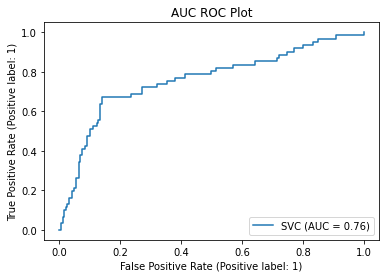

In [68]:
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

Final Accuracy is 81% and AUC score is 76%, which is very good.

In [69]:
# Saving the Model

import joblib
joblib.dump(clf, "Insurance_Fraud_Detection_Analysis.pkl")

['Insurance_Fraud_Detection_Analysis.pkl']